In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import keras_tuner as kt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV

2024-06-05 14:57:35.671000: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 14:57:35.674048: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 14:57:35.716488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 14:57:36.470114: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('HIGGS_100k.csv')
df

label = ['class', 'lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm jj', 'm jjj', 'm lv', 'm jlv', 'm bb', 'm wbb', 'm wwbb']

df.columns = label

df

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m jj,m jjj,m lv,m jlv,m bb,m wbb,m wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.957321,-0.759750,1.210569,0.863929,-0.120751,0.505580,0.058398,-0.496662,1.086538,...,1.127182,1.674563,0.000000,0.838526,0.731589,1.173853,0.848387,0.840251,0.702825,0.642653
99996,1.0,0.878993,-1.687942,-1.318039,0.407732,-1.481964,0.847367,-0.680313,1.462603,1.086538,...,-1.756052,-0.869814,0.000000,0.841216,1.112265,1.003257,0.768167,0.911731,0.911673,0.805071
99997,0.0,1.090185,0.409987,1.036898,0.427749,-1.035207,1.191169,-0.537720,1.576804,2.173076,...,0.301854,-0.435315,3.101961,0.986065,0.995841,0.989216,0.851650,1.313143,1.096304,0.963150
99998,1.0,1.395078,0.143119,-1.087772,0.581583,-0.127351,1.125120,-2.388460,1.306269,0.000000,...,1.423667,-0.208356,0.000000,0.804638,0.679799,0.983816,0.728147,1.098247,1.488028,1.466187


In [3]:
X = df.drop(['class', 'm jj', 'm jjj', 'm lv', 'm jlv', 'm bb', 'm wbb', 'm wwbb'], axis=1) # features
y = df['class'] # target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 21), (60000,)), ((40000, 21), (40000,)))

In [126]:
def model_builder(hp):
  model = Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(21,)))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
  hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
  model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
  model.add(tf.keras.layers.Dense(1, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  
  return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x9')



/home/bruno/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [123]:
def model_builder(hp):
    model = Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(21,)))

    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_dropout_rate = hp.Choice('dropout_rate', values=[0.3, 0.4, 0.5])
    hp_l2_reg = hp.Choice('l2_reg', values=[1e-2, 1e-3, 1e-4])

    if hp_activation == 'leaky_relu':
        activation_layer = tf.keras.layers.LeakyReLU()
    else:
        activation_layer = hp_activation

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=activation_layer,
                                    kernel_regularizer=tf.keras.regularizers.l2(hp_l2_reg)))
    model.add(tf.keras.layers.Dropout(rate=hp_dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=activation_layer,
                                    kernel_regularizer=tf.keras.regularizers.l2(hp_l2_reg)))
    model.add(tf.keras.layers.Dropout(rate=hp_dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x3')



/home/bruno/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [127]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])
tuner.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 2 Complete [00h 00m 02s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 04s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
tanh              |tanh              |activation
801               |701               |layer_1
301               |201               |layer_2
0.01              |0.0001            |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


/home/bruno/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/bruno/.local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
2024-06-05 17:29:44.937572: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0
Traceback (most recent call last):
  File "/home/bruno/.local/lib/python3.10/site-p

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/bruno/.local/lib/python3.10/site-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/bruno/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/bruno/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/bruno/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/bruno/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/bruno/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/bruno/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/bruno/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/bruno/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/bruno/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_78030/608998110.py", line 3, in <module>

  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 234, in search

  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial

  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial

  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial

  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial

  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model

  File "/home/bruno/.local/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 316, in compute_loss

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/losses/losses.py", line 22, in call

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/losses/losses.py", line 1722, in sparse_categorical_crossentropy

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/home/bruno/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_2717248]


In [108]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


/home/bruno/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5330 - loss: 0.7344 - val_accuracy: 0.5682 - val_loss: 0.6808
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5738 - loss: 0.6738 - val_accuracy: 0.5884 - val_loss: 0.6663
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5893 - loss: 0.6677 - val_accuracy: 0.6039 - val_loss: 0.6562
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6020 - loss: 0.6620 - val_accuracy: 0.6068 - val_loss: 0.6563
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6106 - loss: 0.6554 - val_accuracy: 0.6069 - val_loss: 0.6560
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6115 - loss: 0.6544 - val_accuracy: 0.6211 - val_loss: 0.6468
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6191 - loss: 0.6484 - val_accuracy: 0.6211 - val_loss: 0.6451
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6156 - loss: 0.6479 - val_accurac

In [60]:
model.save("Trained_Model5.keras")

In [47]:
pd.DataFrame(history.history).head()

,accuracy,loss,val_accuracy,val_loss
0,0.573750,0.680315,0.589333,0.666304
1,0.606229,0.656664,0.610333,0.650943
2,0.620146,0.645918,0.620917,0.644609
3,0.629938,0.636331,0.627333,0.640045
4,0.641604,0.626441,0.638417,0.633098


In [109]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 101)            │         2,222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 501)            │        51,102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,034 (683.73 KB)

 Trainable params: 58,344 (227.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,690 (455.82 KB)

In [110]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_train, y_train)

print(f'Train Loss: {test_loss}')
print(f'Train Accuracy: {test_accuracy}')

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.6345 - loss: 0.6851
Test Loss: 0.6925455331802368
Test Accuracy: 0.6295250058174133
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7227 - loss: 0.5430
Train Loss: 0.5668333768844604
Train Accuracy: 0.7075833082199097


In [121]:
predictions = model.predict(x_train)

print(predictions)

# Obter as classes preditas (índice da maior probabilidade)
predicted_classes = np.argmax(predictions, axis=1)

predictions = model.predict(x_test)

# Obter as classes preditas (índice da maior probabilidade)
predicted_test = np.argmax(predictions, axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step
[[9.2706069e-02 9.0729392e-01 7.5829222e-16 ... 9.6018882e-16
  7.6305397e-16 5.9435317e-16]
 [7.8459305e-01 2.1540700e-01 7.8052639e-18 ... 1.0186625e-17
  7.2208922e-18 6.0895841e-18]
 [4.3089893e-01 5.6910110e-01 3.3148569e-15 ... 3.4360749e-15
  3.5308551e-15 2.4399091e-15]
 ...
 [5.1206499e-01 4.8793504e-01 9.5923179e-17 ... 6.4828163e-17
  9.3634662e-17 7.7980831e-17]
 [8.4565836e-01 1.5434162e-01 3.6670563e-16 ... 6.1242727e-16
  1.5486240e-16 2.1275494e-16]
 [9.4062275e-01 5.9377223e-02 1.8994889e-13 ... 2.3370528e-13
  1.9070033e-13 1.9530086e-13]]
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step


In [112]:
print('R^2 = ', r2_score(y_train, predicted_classes))
print('MSE = ', mean_squared_error(y_train, predicted_classes))
print('MAE = ', mean_absolute_error(y_train, predicted_classes))
print()
print('R^2 = ', r2_score(y_test, predicted_test))
print('MSE = ', mean_squared_error(y_test, predicted_test))
print('MAE = ', mean_absolute_error(y_test, predicted_test))

R^2 =  -0.1734169280293938
MSE =  0.29241666666666666
MAE =  0.29241666666666666

R^2 =  -0.4867049150658618
MSE =  0.370475
MAE =  0.370475


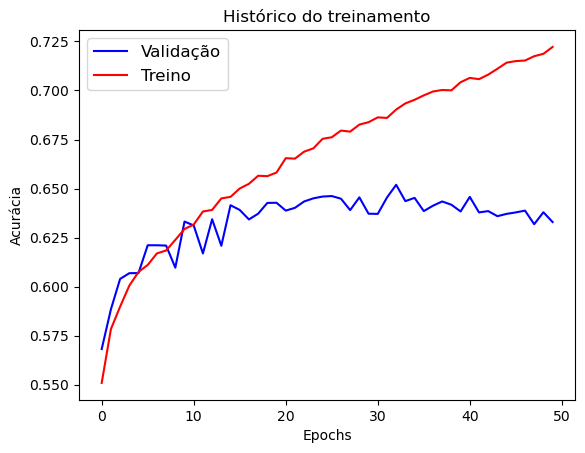

In [113]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_accuracy'], color='b', label="Validação")
plt.plot(history.history['accuracy'], color='r', label="Treino")
plt.title("Histórico do treinamento")
plt.xlabel("Epochs")
plt.ylabel("Acurácia")
plt.legend(fontsize=12)
plt.savefig('teste_4', dpi=300)
plt.show()

In [97]:
histdf = pd.DataFrame(history.history)

print(max(history.history['val_accuracy']))

0.6334999799728394


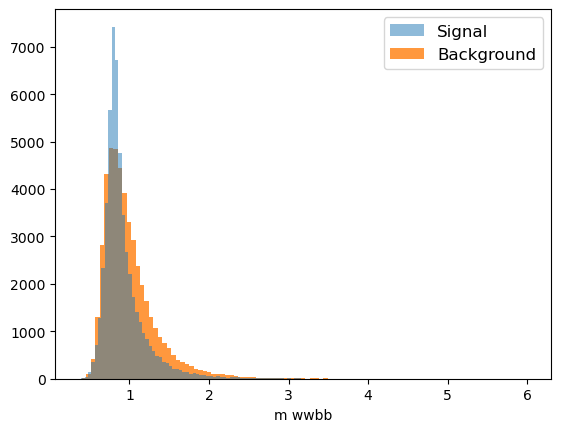

In [114]:
df_1 = df[df['class'] == 1]
df_0 = df[df['class'] == 0]

plt.hist(df_1['m wwbb'], bins=100, label='Signal', alpha=0.5)
plt.hist(df_0['m wwbb'], bins=100, zorder = 0, label='Background', alpha=0.8)
plt.legend(fontsize=12)
plt.xlabel('m wwbb')
plt.savefig('original')
plt.show()

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 845us/step


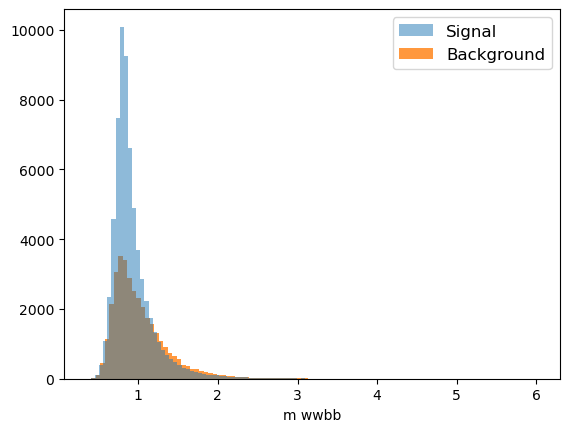

In [116]:
predictions = model.predict(X)
predicted_classes = np.argmax(predictions, axis=1)
df_end = pd.DataFrame(X)
df_end['class'] = predicted_classes
df_end['m wwbb'] = df['m wwbb']

df_1p = df_end[df_end['class'] == 1]
df_0p = df_end[df_end['class'] == 0]

plt.hist(df_1p['m wwbb'], bins=100, label='Signal', alpha=0.5)
plt.hist(df_0p['m wwbb'], bins=100, zorder = 0, label='Background',alpha=0.8)
plt.legend(fontsize=12)
plt.xlabel('m wwbb')
plt.savefig('gpt/sigxback', dpi=300)
plt.show()

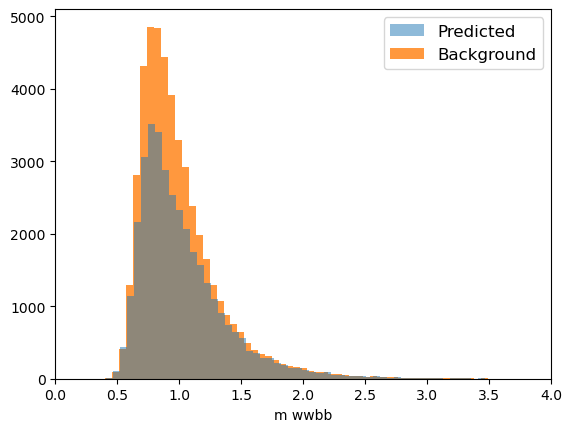

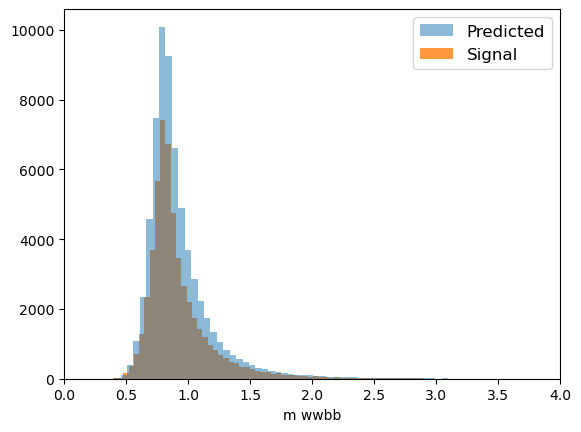

In [119]:
plt.hist(df_0p['m wwbb'], bins=100, label='Predicted', alpha=0.5)
plt.hist(df_0['m wwbb'], bins=100, zorder = 0, label='Background',alpha=0.8)
plt.legend(fontsize=12)
plt.xlabel('m wwbb')
plt.savefig('gpt/back', dpi=300)
plt.xlim(0,4)
plt.show()

plt.hist(df_1p['m wwbb'], bins=100, label='Predicted', alpha=0.5)
plt.hist(df_1['m wwbb'], bins=100, zorder = 0, label='Signal',alpha=0.8)
plt.legend(fontsize=12)
plt.xlabel('m wwbb')
plt.xlim(0,4)
plt.savefig('gpt/sig', dpi=300)
plt.show()